 <h3><b>Task 1: Joining the Datasets<b></h3>

In [3]:
import pandas as pd

In [9]:
chineese_dataset=pd.read_csv('Tsang-2018-LexicalDecision.tsv', header=0, sep='\t')
chineese_dataset.describe

<bound method NDFrame.describe of       CONCEPTICON_ID CONCEPTICON_GLOSS CHINESE  CHINESE_RT_MEAN  \
0                 10          FIREWOOD      柴火       741.216250   
1               1001        BLACKSMITH      铁匠       678.218095   
2               1002            STATUE      雕像       704.751000   
3               1003            PERMIT      允许       654.635500   
4               1004            MUSCLE      肌肉       669.430500   
...              ...               ...     ...              ...   
1104             989             CLEAR      清楚       646.502308   
1105              99         HUNCHBACK      驼背       833.470263   
1106             991               FRY       煎       693.965250   
1107             992             CLIFF      悬崖       773.886250   
1108             999             JOINT      关节       772.491892   

      CHINESE_RT_ZSCORE  CHINESE_STROKE  LINE_IN_SOURCE  
0             -0.295747            14.0            7792  
1             -0.516459            16.0      

In [11]:
aff_rate_dataset=pd.read_csv('Mohammad-2018-AffectiveRatings.tsv', sep='\t', header=0)
aff_rate_dataset.describe

<bound method NDFrame.describe of       CONCEPTICON_ID    CONCEPTICON_GLOSS       ENGLISH  ENGLISH_VALENCE_MEAN  \
0                  1         CONTEMPTIBLE  contemptible                 0.146   
1                 10             FIREWOOD      firewood                 0.520   
2                100             FAITHFUL      faithful                 0.888   
3               1000              ANXIETY       anxiety                 0.146   
4               1001           BLACKSMITH    blacksmith                 0.480   
...              ...                  ...           ...                   ...   
2338             992                CLIFF         cliff                 0.361   
2339             994                  BOW           bow                 0.530   
2340             995  QUIVER (FOR ARROWS)        quiver                 0.320   
2341             998                  PUT           put                 0.520   
2342             999                JOINT         joint                 0.6

In [15]:
merged_dataset=pd.merge(chineese_dataset,aff_rate_dataset, on='CONCEPTICON_ID',how='inner')

In [19]:

merged_dataset.describe

<bound method NDFrame.describe of      CONCEPTICON_ID CONCEPTICON_GLOSS_x CHINESE  CHINESE_RT_MEAN  \
0                10            FIREWOOD      柴火       741.216250   
1              1001          BLACKSMITH      铁匠       678.218095   
2              1002              STATUE      雕像       704.751000   
3              1003              PERMIT      允许       654.635500   
4              1004              MUSCLE      肌肉       669.430500   
..              ...                 ...     ...              ...   
952             989               CLEAR      清楚       646.502308   
953              99           HUNCHBACK      驼背       833.470263   
954             991                 FRY       煎       693.965250   
955             992               CLIFF      悬崖       773.886250   
956             999               JOINT      关节       772.491892   

     CHINESE_RT_ZSCORE  CHINESE_STROKE  LINE_IN_SOURCE_x CONCEPTICON_GLOSS_y  \
0            -0.295747            14.0              7792            F

In [384]:
merged_dataset.count()

CONCEPTICON_ID            957
CONCEPTICON_GLOSS_x       957
CHINESE                   957
CHINESE_RT_MEAN           957
CHINESE_RT_ZSCORE         957
CHINESE_STROKE            956
LINE_IN_SOURCE_x          957
CONCEPTICON_GLOSS_y       957
ENGLISH                   957
ENGLISH_VALENCE_MEAN      957
ENGLISH_AROUSAL_MEAN      957
ENGLISH_DOMINANCE_MEAN    957
LINE_IN_SOURCE_y          957
dtype: int64

<h3><b> Task 2: Arousal and Reaction Times by Number of Strokes</b></h3>
a)

In [386]:
grouped_data=merged_dataset.groupby('CHINESE_STROKE').agg(
    {'ENGLISH_AROUSAL_MEAN':'mean','CHINESE_RT_MEAN':'mean'}).reset_index()



In [387]:
grouped_data.head()

,CHINESE_STROKE,ENGLISH_AROUSAL_MEAN,CHINESE_RT_MEAN
0,3.0,0.306500,659.623373
1,4.0,0.363444,692.974473
2,5.0,0.448556,657.017944
3,6.0,0.486000,711.511801
4,7.0,0.489280,674.809692


b)

In [389]:
grouped_data['ENGLISH_AROUSAL_MEAN']=grouped_data['ENGLISH_AROUSAL_MEAN']*1000
grouped_data.head()

,CHINESE_STROKE,ENGLISH_AROUSAL_MEAN,CHINESE_RT_MEAN
0,3.0,306.500000,659.623373
1,4.0,363.444444,692.974473
2,5.0,448.555556,657.017944
3,6.0,486.000000,711.511801
4,7.0,489.280000,674.809692


In [390]:
ordered_dataset=grouped_data.sort_values('CHINESE_STROKE')
ordered_dataset.head()

,CHINESE_STROKE,ENGLISH_AROUSAL_MEAN,CHINESE_RT_MEAN
0,3.0,306.500000,659.623373
1,4.0,363.444444,692.974473
2,5.0,448.555556,657.017944
3,6.0,486.000000,711.511801
4,7.0,489.280000,674.809692


In [391]:
import seaborn as sns
import matplotlib.pyplot  as plt

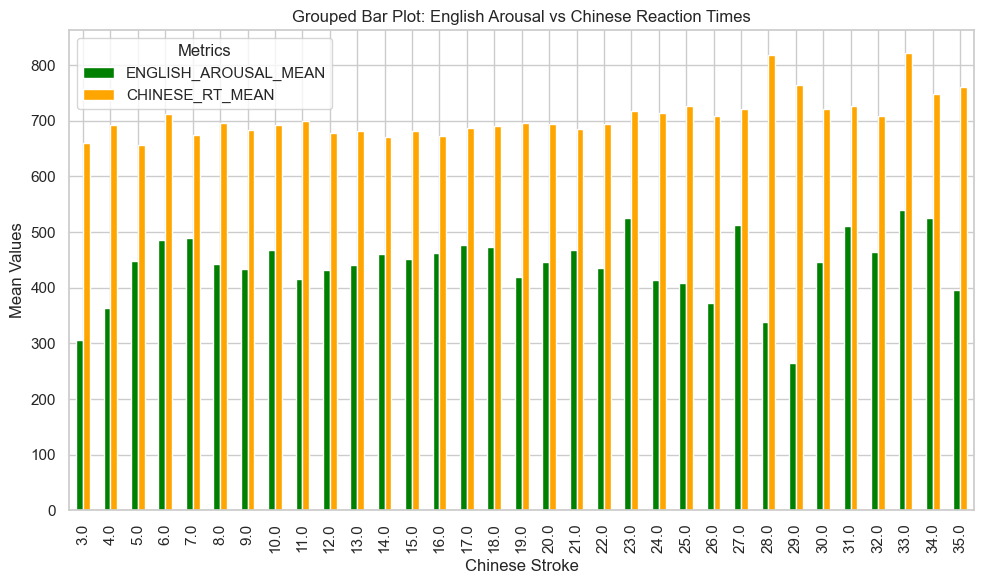

In [392]:

df = ordered_dataset.sort_values(by='CHINESE_STROKE')

# Plot the grouped bar chart
df.plot(kind='bar', x='CHINESE_STROKE', y=['ENGLISH_AROUSAL_MEAN',
                                           'CHINESE_RT_MEAN'], figsize=(10, 6),
        color=['green', 'orange'])

# Customize the plot
plt.title('Grouped Bar Plot: English Arousal vs Chinese Reaction Times')
plt.xlabel('Chinese Stroke')
plt.ylabel('Mean Values')
plt.xticks(rotation=90)  # Keep x-axis labels horizontal
plt.legend(title='Metrics')
plt.tight_layout()

# Show the plot
plt.show()


<h3><b>  Task 3: Further Exploratory Data Analysis</b></h3>

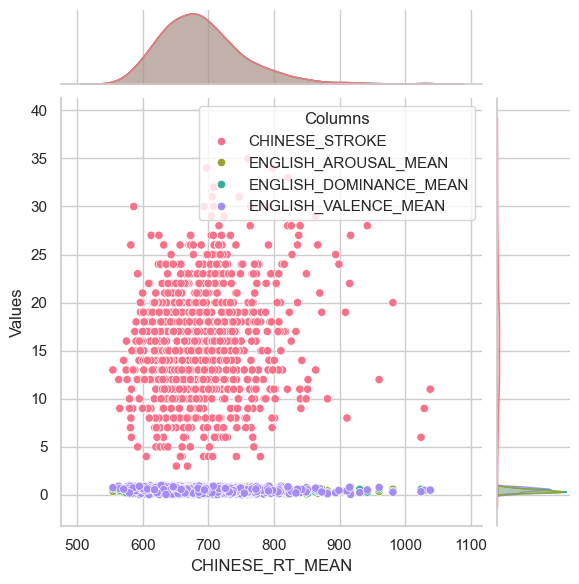

In [394]:

data=merged_dataset;

target_column = 'CHINESE_RT_MEAN'
columns_to_compare = ['CHINESE_STROKE','ENGLISH_AROUSAL_MEAN','ENGLISH_DOMINANCE_MEAN',
                      'ENGLISH_VALENCE_MEAN']

long_data = data.melt(id_vars=[target_column], value_vars=columns_to_compare, 
                      var_name='Columns', value_name='Values')

g = sns.jointplot(data=long_data, x=target_column, y='Values', hue='Columns',
                  kind="scatter", palette="husl")

# Show plot
plt.show()



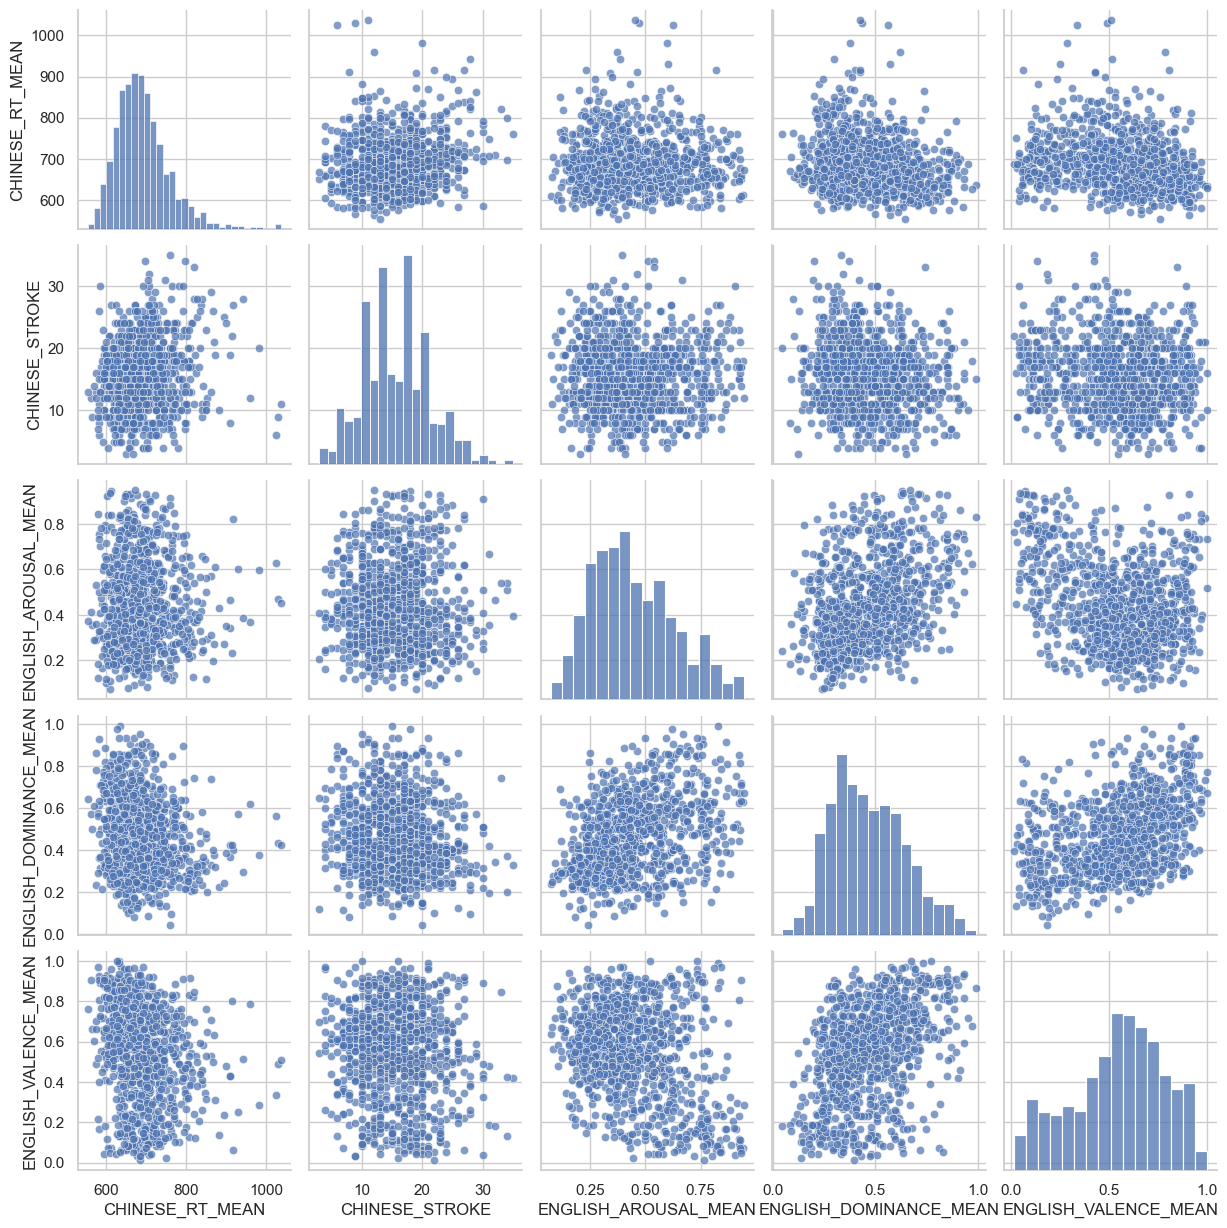

In [395]:


column1 = 'CHINESE_RT_MEAN'
selected_columns = ['CHINESE_STROKE','ENGLISH_AROUSAL_MEAN','ENGLISH_DOMINANCE_MEAN',
                    'ENGLISH_VALENCE_MEAN']

# Subset the dataset to include column1 and the selected columns
columns_to_compare = [column1] + selected_columns
subset_data = data[columns_to_compare]

# Create a pairplot to compare the selected columns with column1
sns.pairplot(subset_data, kind="scatter", diag_kind="hist", plot_kws={'alpha': 0.7})

# Show the plot
plt.show()


<h3><b> Task 4: Bringing Frequencies into the Picture</b></h3>


In [398]:
column =['CHINESE', 'ROW_FREQUENCY']
cmn_dataset=pd.read_csv("cmn-opensubtitles-freq.tsv", sep='\t', header=None, 
                        names=column )
cmn_dataset.head()

,CHINESE,ROW_FREQUENCY
0,的,3957141
1,我,3669472
2,你,3282942
3,了,2141739
4,是,1670639


In [399]:
import numpy as np

In [400]:
cmn_dataset['LOG_FREQUENCY']=np.log(cmn_dataset['ROW_FREQUENCY']).round(3)
cmn_dataset.head()

,CHINESE,ROW_FREQUENCY,LOG_FREQUENCY
0,的,3957141,15.191
1,我,3669472,15.116
2,你,3282942,15.004
3,了,2141739,14.577
4,是,1670639,14.329


In [441]:
m_dataset=pd.merge(merged_dataset,cmn_dataset, on='CHINESE')
m_dataset.head()

,CONCEPTICON_ID,CONCEPTICON_GLOSS_x,CHINESE,CHINESE_RT_MEAN,CHINESE_RT_ZSCORE,CHINESE_STROKE,LINE_IN_SOURCE_x,CONCEPTICON_GLOSS_y,ENGLISH,ENGLISH_VALENCE_MEAN,ENGLISH_AROUSAL_MEAN,ENGLISH_DOMINANCE_MEAN,LINE_IN_SOURCE_y,ROW_FREQUENCY,LOG_FREQUENCY
0,10,FIREWOOD,柴火,741.216250,-0.295747,14.0,7792,FIREWOOD,firewood,0.520,0.348,0.263,6736,166,5.112
1,1001,BLACKSMITH,铁匠,678.218095,-0.516459,16.0,8258,BLACKSMITH,blacksmith,0.480,0.531,0.702,1785,191,5.252
2,1002,STATUE,雕像,704.751000,-0.464274,29.0,10389,STATUE,statue,0.542,0.153,0.570,16845,957,6.864
3,1003,PERMIT,允许,654.635500,-0.663564,10.0,2482,PERMIT,allow,0.698,0.429,0.538,518,6262,8.742
4,1004,MUSCLE,肌肉,669.430500,-0.558841,12.0,4721,MUSCLE,muscle,0.359,0.490,0.645,11503,1659,7.414


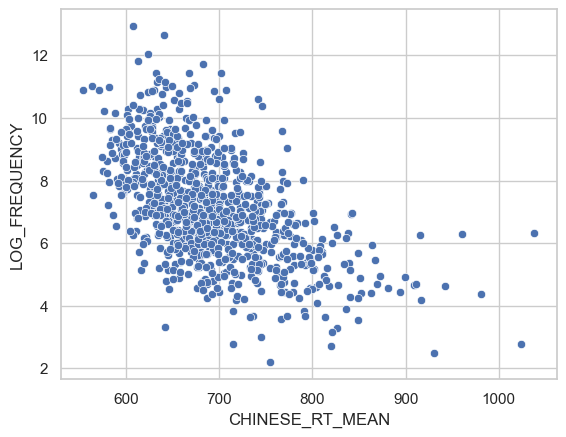

In [433]:
sns.scatterplot(data=m_dataset,x=m_dataset['CHINESE_RT_MEAN'],
                y=m_dataset['LOG_FREQUENCY'])
plt.show()

<h3><b>Task 5: Fitting Regression Models in Scikit-Learn</b></h3> 

In [453]:
# a)
m_dataset=m_dataset.dropna()
m_dataset.count()

CONCEPTICON_ID            955
CONCEPTICON_GLOSS_x       955
CHINESE                   955
CHINESE_RT_MEAN           955
CHINESE_RT_ZSCORE         955
CHINESE_STROKE            955
LINE_IN_SOURCE_x          955
CONCEPTICON_GLOSS_y       955
ENGLISH                   955
ENGLISH_VALENCE_MEAN      955
ENGLISH_AROUSAL_MEAN      955
ENGLISH_DOMINANCE_MEAN    955
LINE_IN_SOURCE_y          955
ROW_FREQUENCY             955
LOG_FREQUENCY             955
dtype: int64

In [473]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

In [456]:
# b)
X = m_dataset[['ENGLISH_DOMINANCE_MEAN', 'ENGLISH_VALENCE_MEAN', 
               'ENGLISH_AROUSAL_MEAN', 'CHINESE_STROKE', 'LOG_FREQUENCY']]

y = m_dataset['CHINESE_RT_MEAN']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)

models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': RidgeCV(),
    'Lasso Regression': LassoCV(),
    'SGD Regressor': SGDRegressor(),
    'SVR': SVR()
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)  
    y_pred = model.predict(X_test)  
    
    mse = mean_squared_error(y_test, y_pred)  
    r2 = r2_score(y_test, y_pred)  
    
    results[name] = {'MSE': mse, 'R²': r2}

results_df = pd.DataFrame(results).T
print(results_df)

                           MSE        R²
Linear Regression  2785.898089  0.181217
Ridge Regression   2773.850063  0.184758
Lasso Regression   2782.847728  0.182114
SGD Regressor      3153.532239  0.073169
SVR                3104.976049  0.087440


Ridge Regression appears to be the best model for predicting reaction time

In [464]:
from itertools import combinations

<h3><b>Task 6: Model Selection</b></h3> 

In [475]:

best_models = {}
n_features = X.shape[1]

for k in range(1, n_features + 1):
    best_r2 = -np.inf
    best_combination = None
    
    for combo in combinations(X.columns, k):
        X_combo = X[list(combo)]  
        
        model = RidgeCV(cv=10)  
        r2_scores = cross_val_score(model, X_combo, y, cv=10, scoring='r2')
        
        mean_r2 = np.mean(r2_scores)
        
        if mean_r2 > best_r2:
            best_r2 = mean_r2
            best_combination = combo
    
    best_models[k] = {
        'best_combination': best_combination,
        'best_r2': best_r2
    }

best_models_df = pd.DataFrame(best_models).T
print(best_models_df)


                                    best_combination   best_r2
1                                   (LOG_FREQUENCY,)  0.299805
2              (ENGLISH_VALENCE_MEAN, LOG_FREQUENCY)  0.308063
3  (ENGLISH_VALENCE_MEAN, CHINESE_STROKE, LOG_FRE...  0.307408
4  (ENGLISH_DOMINANCE_MEAN, ENGLISH_VALENCE_MEAN,...  0.307247
5  (ENGLISH_DOMINANCE_MEAN, ENGLISH_VALENCE_MEAN,...  0.306305
